#                      Diabetics Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset

In [4]:
data = pd.read_csv("C:\\Users\\niran\\Downloads\\diabetic csv\\diabetes.csv")

In [5]:
# display first 5 rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [6]:
# display last 5 rows of dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76.0,48,180.0,32.9,0.171,63,0
764,2,122,70.0,27,102.5,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,32,169.5,30.1,0.349,47,1
767,1,93,70.0,31,102.5,30.4,0.315,23,0


In [7]:
#display randomly any no:of records od dataset
data.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
248,9,124,70.0,33,402.0,35.4,0.282,34,0
526,1,97,64.0,19,82.0,18.2,0.299,21,0
149,2,90,70.0,17,102.5,27.3,0.085,22,0
336,0,117,70.0,27,102.5,33.8,0.932,44,0
329,6,105,70.0,32,68.0,30.8,0.122,37,0
8,2,197,70.0,45,543.0,30.5,0.158,53,1


In [8]:
# display no:of rows and columns
data.shape

(768, 9)

# Data preprocessing

In [9]:
# dataset contain null values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [10]:
# to check null values in every column
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# to check duplicate values in dataset
data.duplicated().sum()

0

In [12]:
# If duplicates exist remove duplicate values
data=data.drop_duplicates()

In [13]:
# statistical summary 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA

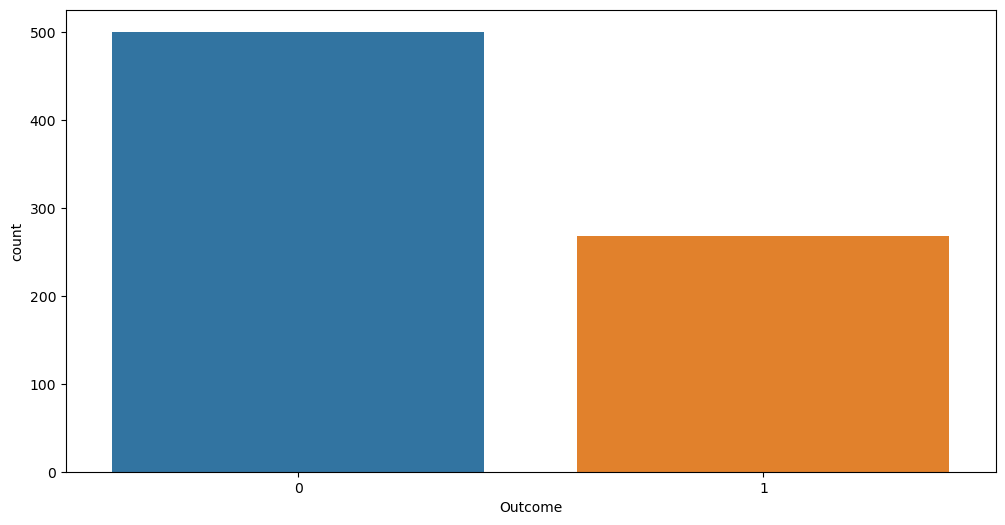

In [14]:
# counts no:of diabetic positive and negative(blue=negative,orange=positive)
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

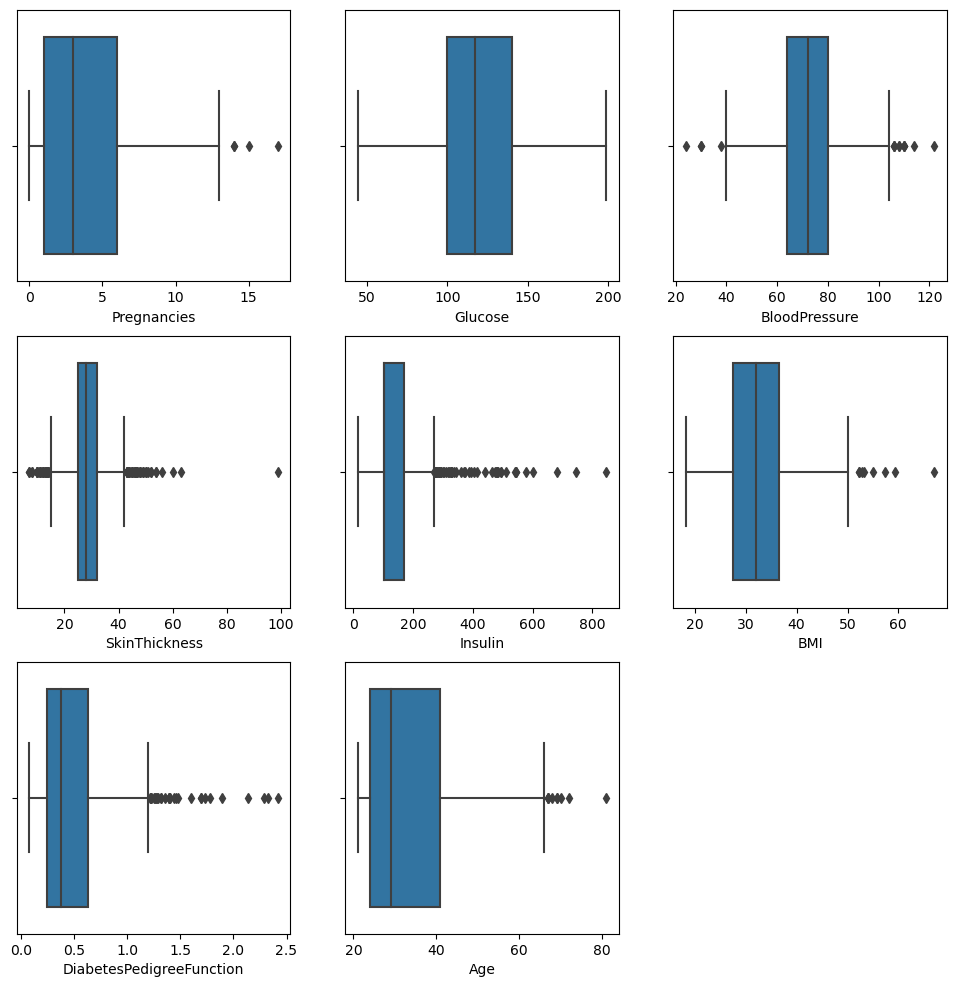

In [15]:
# subplot and boxplot are used to identify the outliers
plt.figure(figsize = (12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
        plt.subplot(3,3,i+1)
        sns.boxplot(x = col, data = data)
plt.show()


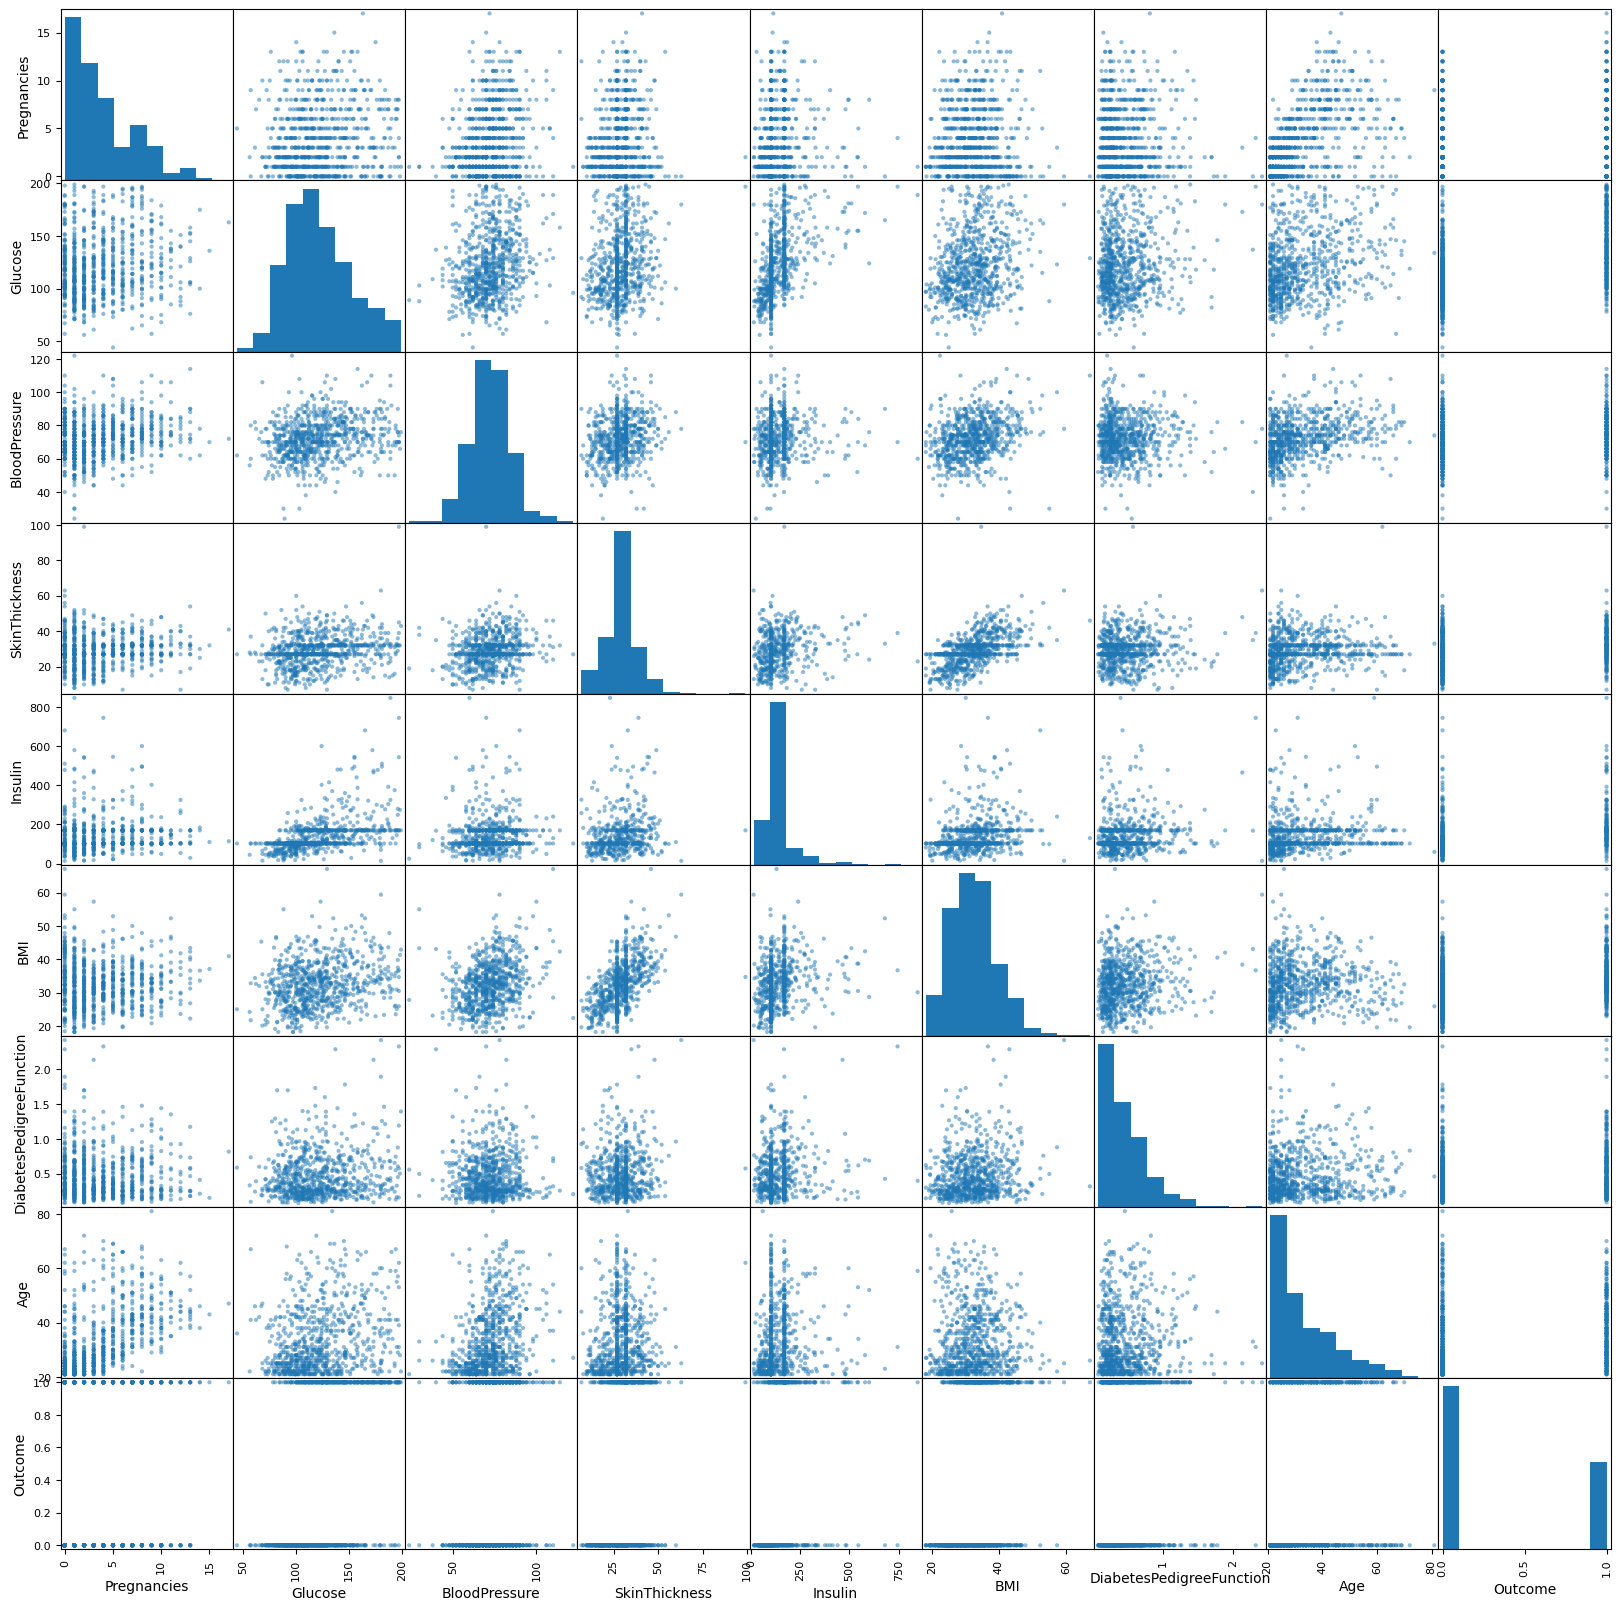

In [16]:
# Scatter plot describes values of 2 variables along the 2 axis
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

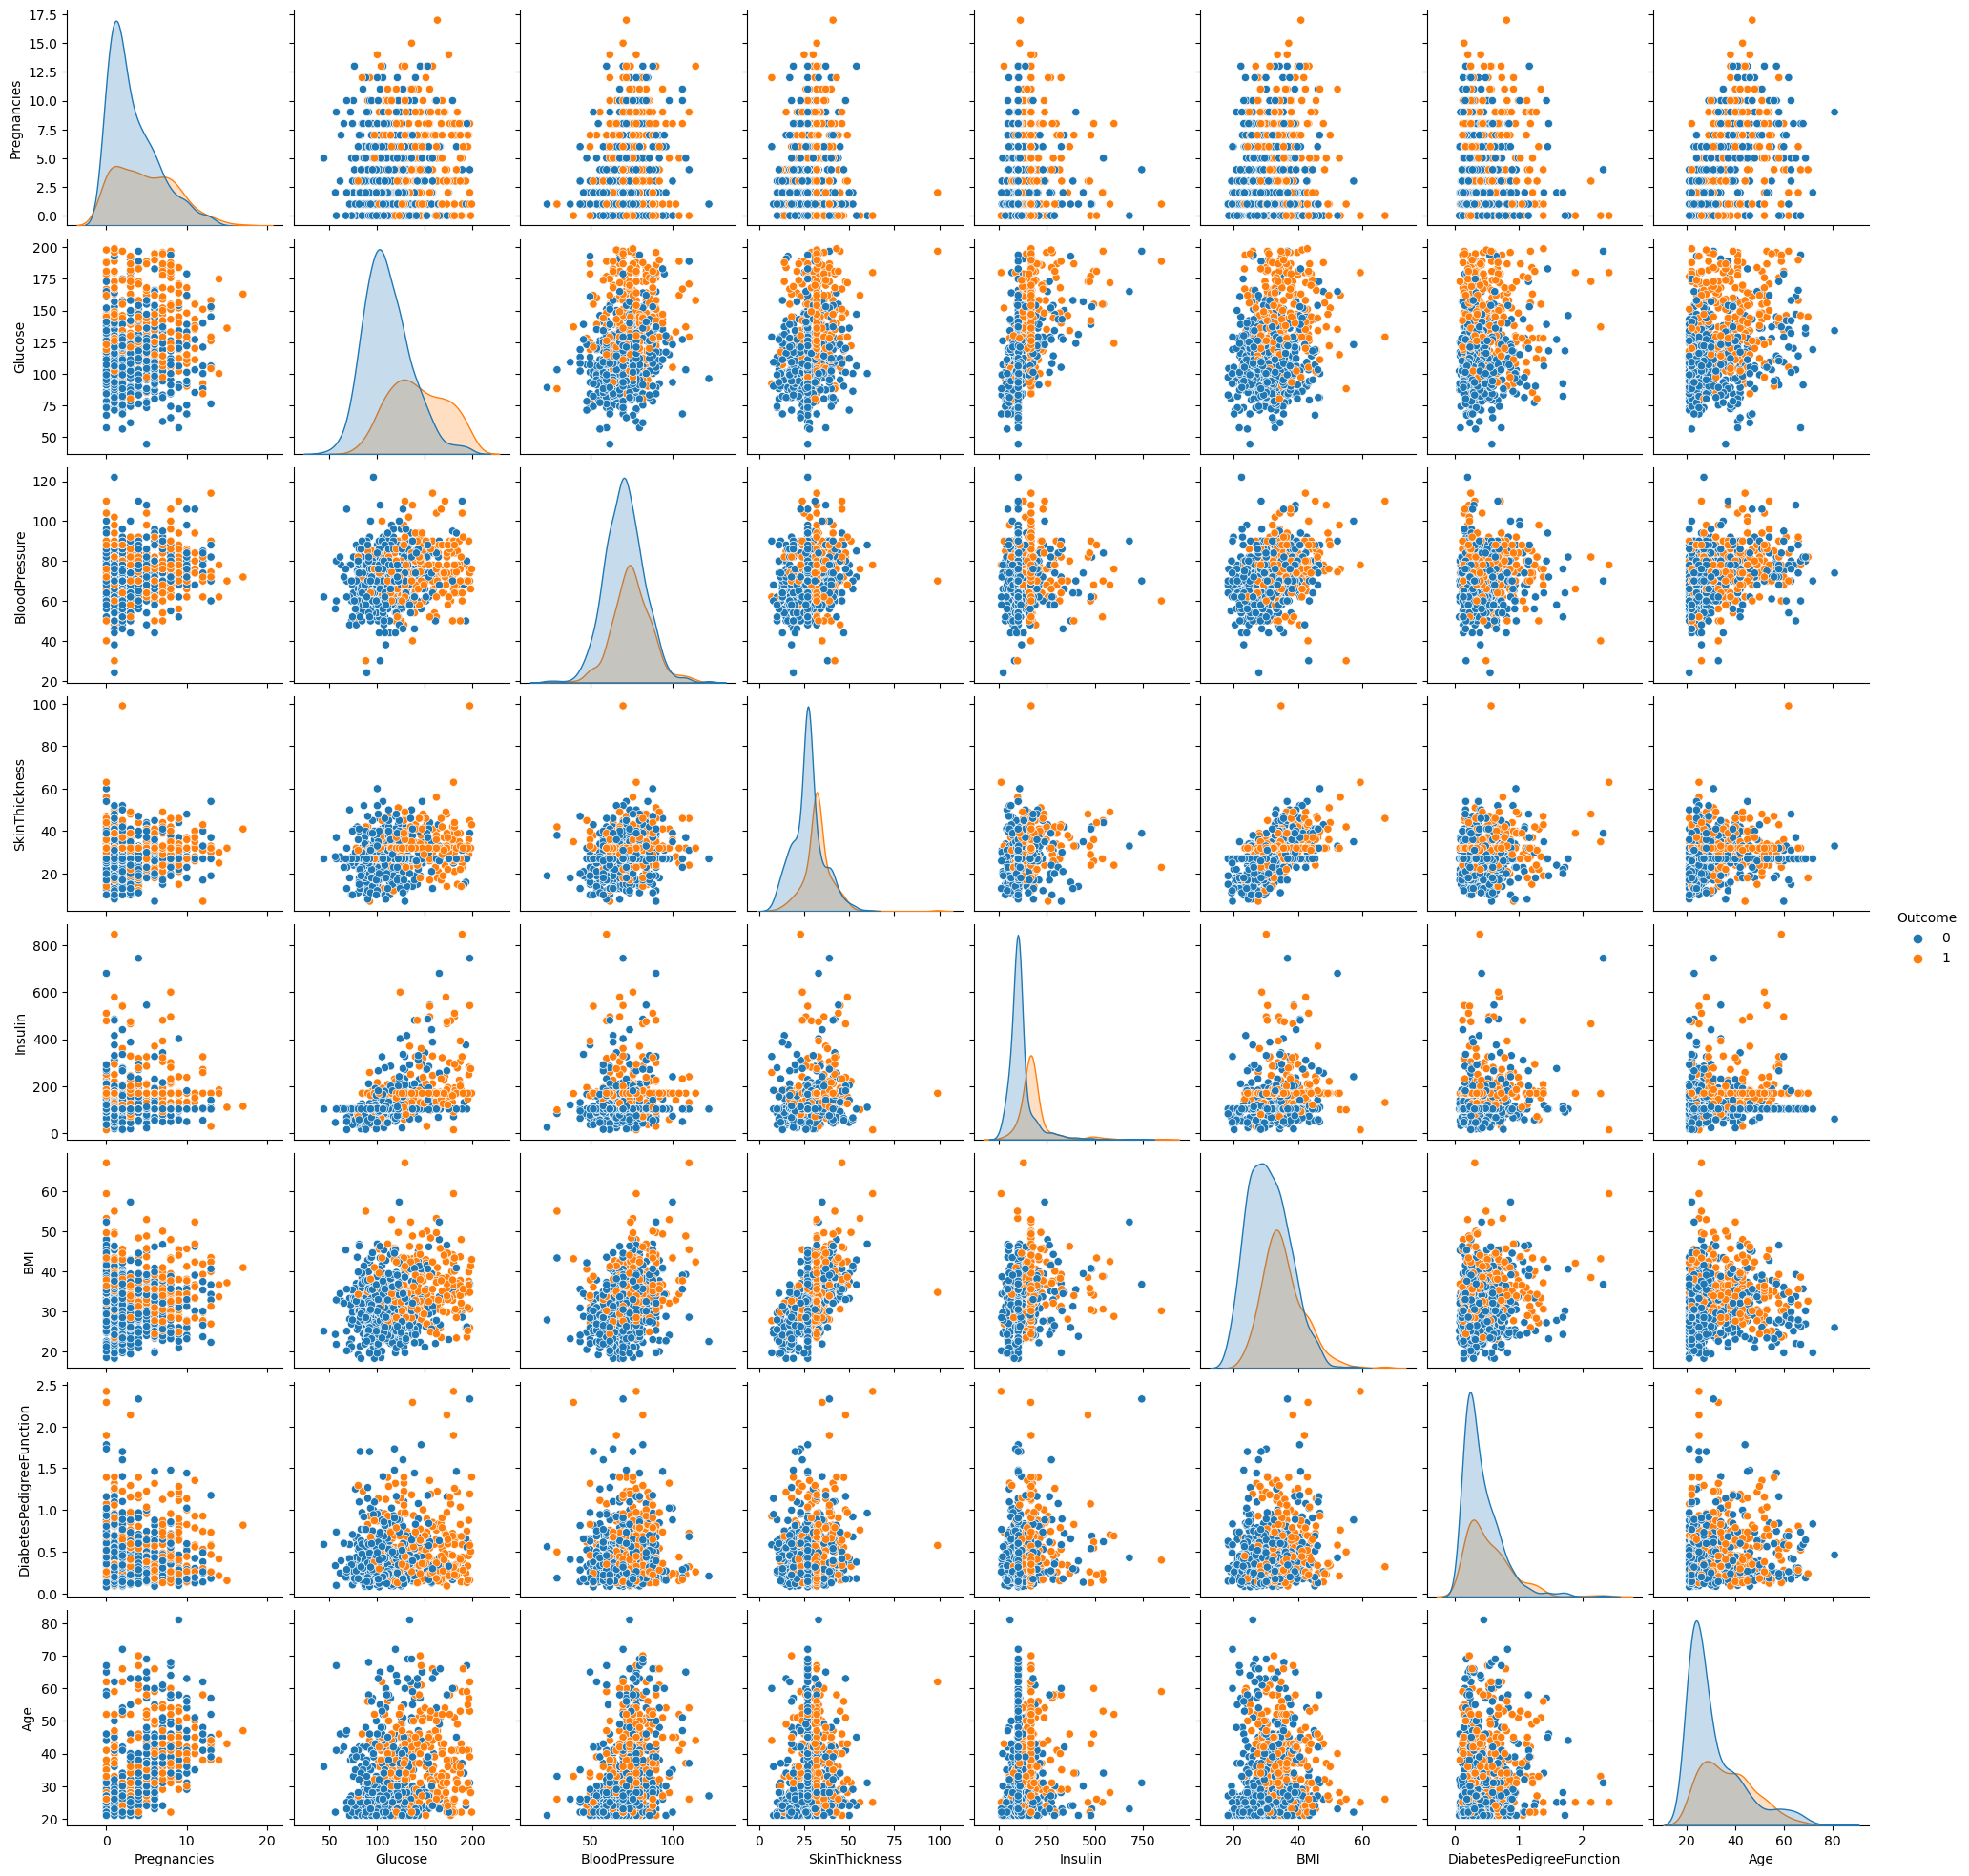

In [17]:
# pairplot is to create scatter plots between all variables
sns.pairplot(data, hue='Outcome',data=data)
plt.show()

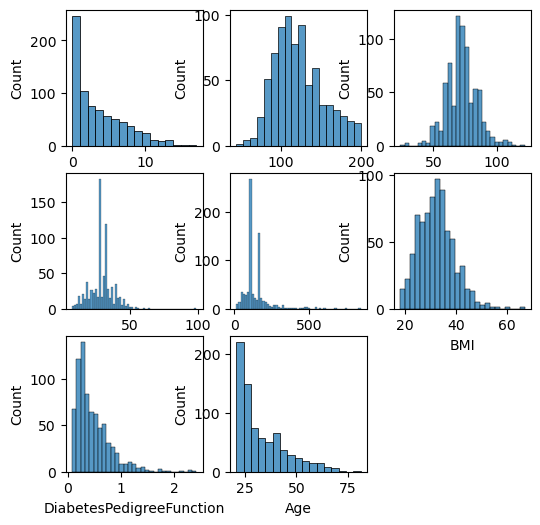

In [18]:
# histograms dusplay numeric data i.e wheter the data is normally distributed or skewed
plt.figure(figsize=(6,6))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
        plt.subplot(3,3,i+1)
        sns.histplot(x = col, data = data)
plt.show()

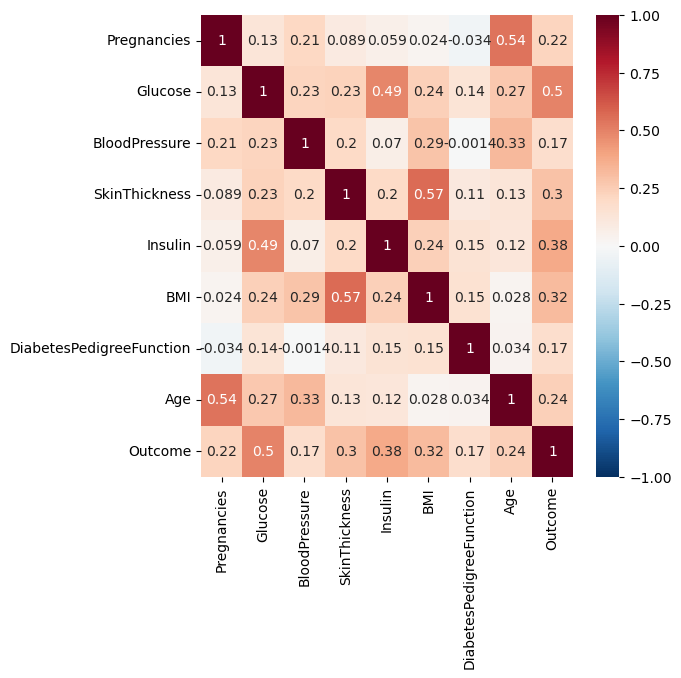

In [19]:
# heatmap is used to describe correlation between variables
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),vmin=-1.0,center=0,cmap='RdBu_r',annot=True,data=data)
plt.show()

# splitting data into x and y

In [20]:
target_name='Outcome'
# seperate outcome from dataset
y=data[target_name]
# seperate dependent(input features) from dataset
x=data.drop(target_name,axis=1)

In [21]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,169.5,33.6,0.627,50
1,1,85,66.0,29,102.5,26.6,0.351,31
2,8,183,64.0,32,169.5,23.3,0.672,32
3,1,89,66.0,23,94.0,28.1,0.167,21
4,0,137,40.0,35,168.0,43.1,2.288,33


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# feature engineering

In [28]:
# standardscaler standardizes the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=7)

In [30]:
X_test.shape,y_test.shape

((154, 8), (154,))

# model training

#### logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

#### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

#### Naive Bayes 

In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

## Making Prediction

#### using logistic regression

In [39]:
X_test.shape

(154, 8)

In [40]:
# prection on test dataset
lr_pred=lr.predict(X_test)

In [41]:
lr_pred.shape

(154,)

#### using KNN

In [42]:
#  prediction on testdata
knn_pred=knn.predict(X_test)

C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
knn_pred.shape

(154,)

#### using decision tree

In [44]:
dt_pred=dt.predict(X_test)

#### using Naive Bayes

In [45]:
nb_pred=nb.predict(X_test)

#### using Random Forest

In [46]:
rf_pred=rf.predict(X_test)

## Train and test score

In [47]:
# using logistic regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regreesion",lr.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test,y_test)*100)
print("Accuracy (Test) score of Logistic Regression",accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regreesion 78.66449511400651
Accuracy (Test) score of Logistic Regression 81.16883116883116
Accuracy (Test) score of Logistic Regression 81.16883116883116


In [48]:
#  using KNN
print("Train Accuracy of KNN",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of KNN",knn.score(X_test,y_test)*100)
print("Accuracy (Test) score of KNN",accuracy_score(y_test,knn_pred)*100)

Train Accuracy of KNN 85.99348534201955
Accuracy (Test) score of KNN 79.22077922077922
Accuracy (Test) score of KNN 79.22077922077922


C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [49]:
#  using Decision Tree
print("Train Accuracy of Decision Tree",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decision Tree",dt.score(X_test,y_test)*100)
print("Accuracy (Test) score of Decision Tree",accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Decision Tree 85.99348534201955
Accuracy (Test) score of Decision Tree 85.71428571428571
Accuracy (Test) score of Decision Tree 85.71428571428571


C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
# using Naive Bayes Clasifier
print("Train Accuracy of Naive Bayes",nb.score(X_train,y_train)*100)
print("Accuracy (Test) score of Naive Bayes",nb.score(X_test,y_test)*100)
print("Accuracy (Test) score of Naive Bayes",accuracy_score(y_test,nb_pred)*100)

Train Accuracy of Naive Bayes 77.19869706840392
Accuracy (Test) score of Naive Bayes 77.27272727272727
Accuracy (Test) score of Naive Bayes 77.27272727272727


In [51]:
# using Random Forest
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest",rf.score(X_test,y_test)*100)
print("Accuracy (Test) score ofRandom Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 88.96103896103897
Accuracy (Test) score ofRandom Forest 88.96103896103897


#### confusion martix

In [52]:
# confusion matrix is used to compare predicted values with actual values
from sklearn.metrics import classification_report,confusion_matrix


In [53]:
# for Logistic Regression
cm=confusion_matrix(y_test,lr_pred)
cm

array([[86, 11],
       [18, 39]], dtype=int64)

<AxesSubplot:>

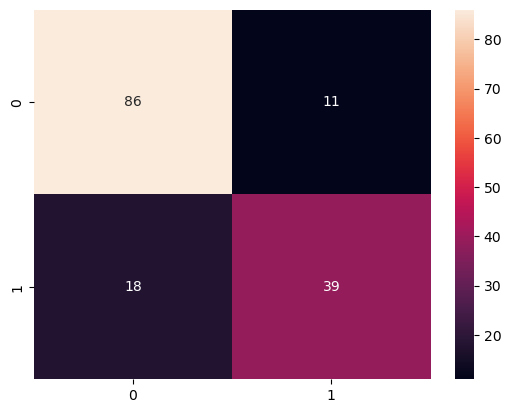

In [54]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')

In [57]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [59]:
TN,FP,FN,TP

(86, 11, 18, 39)

In [60]:
# confusion matrix for Logistic Regresion
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,lr_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))



TN-True Negative 86
FP-False Positive 11
FN-False Negative 18
TP-True Positive 39
Accuracy Rate: 81.16883116883116
Misclassification Rate: 18.83116883116883


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.78      0.68      0.73        57

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



In [62]:
#confusion matrix for KNN
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,knn_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 82
FP-False Positive 15
FN-False Negative 17
TP-True Positive 40
Accuracy Rate: 79.22077922077922
Misclassification Rate: 20.77922077922078


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.73      0.70      0.71        57

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.79      0.79      0.79       154



In [65]:
# confusion matrix for decision tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,dt_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 89
FP-False Positive 8
FN-False Negative 14
TP-True Positive 43
Accuracy Rate: 85.71428571428571
Misclassification Rate: 14.285714285714285


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        97
           1       0.84      0.75      0.80        57

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



In [67]:
# confusion matrix for Naive Bayes
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,nb_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 80
FP-False Positive 17
FN-False Negative 18
TP-True Positive 39
Accuracy Rate: 77.27272727272727
Misclassification Rate: 22.727272727272727


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        97
           1       0.70      0.68      0.69        57

    accuracy                           0.77       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.77      0.77      0.77       154



In [70]:
# confusion matrix for Random Forest
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,rf_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 91
FP-False Positive 6
FN-False Negative 11
TP-True Positive 46
Accuracy Rate: 88.96103896103897
Misclassification Rate: 11.03896103896104


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        97
           1       0.88      0.81      0.84        57

    accuracy                           0.89       154
   macro avg       0.89      0.87      0.88       154
weighted avg       0.89      0.89      0.89       154

